# Forecasting android app company privacy permissions requests
Michael Steckler, Chelsea Shu, Julian Pelzner, and Ollie Downs 
## Introduction
With the rise of new regulations, such as GDPR, privacy compliance organizations will need to forecast their future workflows. In order to complete and review permissions requests for mobile applications worldwide, privacy compliance organizations will need to hire compliance analysts, which affects their labor expenditures. We want to help these organizations with these forecasting tasks. We decided to focus on android apps in particular.

For some background context, the EU's General Data Protection Regulation (GDPR, implemented 2018) was a major privacy law that was aimed at regulating companies in ways that would protect people’s personal data, and curb some of the behavior of companies that has made the headlines of international news. The spirit of the legislation is rooted in the philosophy that people ought to have the right to control their own data assets. The fallout/aftermath of numerous scandals involving household technology companies, such as Cambridge Analytica, Facebook, the increasing awareness of targeted advertising, as well as the growing occurence of ransomware attacks has been sobering for the citizenry and lawmakers alike. 

With the rise of overarching privacy regulations, such as GDPR, privacy compliance organizations and lawmaking bodies will need to forecast their future workflows. In order to complete and review permissions requests for mobile applications worldwide, these organizations will need to adapt to increased workflows by hiring more compliance analysts. Considering that this could be costly and time-intensive for many organizations, the opportunity to solve vital, time-consuming problems is rich. As such, we have ventured to build privacy management tools and models to help organizations forecast, expedite, and make strategic decisions regarding privacy compliance. Our project could not be more relevant.

Our report focuses on building models related to permissions requests. In a theorized, ideal free market, the private sector and everyday people would come to an equilibrium in terms of the amount and appropriateness of permissions requests. The reality is that most individuals don’t have the time, capacity, or knowledge to understand the content and technical jargon within an app’s Terms and Conditions when they are downloaded onto people’s devices. Moreover, companies have not been fully transparent about how exactly they intend to use the personal data they gather. With GDPR, governments are now responding to this issue with more enhanced scrutiny on how companies can use data collected by permissions requests, especially permissions requests that are regarded as dangerous.

In this report, we compare several machine learning models to address three business goals: 
Predicting the number of total permissions requests post-GDPR, 
Predicting whether an app will request dangerous permissions post-GDPR or not, and 
Predicting the number of dangerous permissions requests post-GDPR.

Predicting the number of post-GDPR permissions requests can enable organizations to forecast the amount of requests their firms will need to process and how long it will take. Predicting whether an app will request dangerous permissions post-GDPR or not is important because it can inform lawmakers to push for stronger legislation on apps in a given country. Moreover, it is important to predict the number of both total and dangerous permissions requests because it can provide insights on how developers are asking for more permissions that needed to operate their apps. This information could be useful to inform future policy. 

## Goals
We have a few goals in particular that we are trying to achieve through analysis of this dataset.<br>
A primary goal of ours is to *predict the number of permissions requests that a package will have, post-GDPR*.<br>
A secondary goal is to be able to


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data
Our models are trained on data used in an Indiana University School of Informatics, Computing, and Engineering research paper titled “Apps, Code, Culture, and Market Reform: Examining Influences on Android Permissions” (2019). We credit the authors and contributors of this work for graciously allowing us to access this easily workable dataset. This dataset focuses on android apps in particular.

The original paper is included in this GitHub repository.

## Data Cleaning
We imported, merged our two datasets, and removed irrelevant columns.

In [3]:
#import data
pre = pd.read_csv("OLD_permissions_data.csv")
post = pd.read_csv("NEW_permissions_data.csv")

In [4]:
#merge data and view the dataframe
gdpr_merge = pre.merge(post, on = ['package_name', 'country'], how = 'inner',  suffixes=('_pre', '_post'))

gdpr_merge.head()

,record_num_pre,category_country_num_pre,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,record_num_post,category_country_num_post,category_post,google_rank_post,permissions_post,permission_count_post,file_size_post
0,1,1,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,1,1,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",2,3710134
1,3,3,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,2,2,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",27,5779024
2,5,5,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,3,3,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",21,17946632
3,7,7,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,4,4,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",22,12309718
4,8,8,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,5,5,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486213


In [5]:
#drop record num and category country number columns and view the new dataframe
gdpr_merge.drop(["record_num_pre","category_country_num_pre", "record_num_post", "category_country_num_post"],axis = 1, inplace = True)
gdpr_merge.head()

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,permission_count_post,file_size_post
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",2,3710134
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",27,5779024
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",21,17946632
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",22,12309718
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486213


In [153]:
#check for null values
gdpr_merge.isnull().sum()

package_name             0
country                  0
category_pre             0
google_rank_pre          0
permissions_pre          0
permission_count_pre     0
file_size_pre            0
category_post            0
google_rank_post         0
permissions_post         0
permission_count_post    0
file_size_post           0
US                       0
South Korea              0
Germany                  0
Lifestyle_pre            0
Ages 5 and Under_pre     0
Social_pre               0
Lifestyle_post           0
Ages 5 and Under_post    0
Social_post              0
pre_parsed               0
post_parsed              0
pre_parsed_dangerous     0
pre_parsed_safe          0
post_parsed_dangerous    0
post_parsed_safe         0
pre_dangerous            0
post_dangerous           0
pre_dangerous_count      0
post_dangerous_count     0
dtype: int64

### Adding columns to represent which country the app is from

In [7]:
# #dummy code the countries: 0 for United States, 1 for South Korea, and 2 for Germany
# gdpr_merge['country'].replace({"United States": 0, "South Korea" : 1, "Germany" : 2}, inplace = True)
#make three columns for the cateogory column to dummy code

US= []
SK= []
G= []
for i in gdpr_merge['country']:
    if i == 'United States':
        US.append(1)
        SK.append(0)
        G.append(0)
        
    elif i == "South Korea":
        US.append(0)
        SK.append(1)
        G.append(0)
    else:
        US.append(0)
        SK.append(0)
        G.append(1)

In [8]:
#add the 3 new columns into the dataframe and view the dataframe again
gdpr_merge['US'] = US
gdpr_merge['South Korea'] = SK
gdpr_merge['Germany'] = G

gdpr_merge.head()

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,permission_count_post,file_size_post,US,South Korea,Germany
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",2,3710134,1,0,0
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",27,5779024,1,0,0
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",21,17946632,1,0,0
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",22,12309718,1,0,0
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486213,1,0,0


In [9]:
gdpr_merge['category_pre'].unique()

array(['Lifestyle', 'Social', 'Ages 5 & Under'], dtype=object)

In [10]:
#make three columns for the cateogory column to dummy code for category

l= []
a= []
s= []
for i in gdpr_merge['category_pre']:
    if i == 'Lifestyle':
        l.append(1)
        a.append(0)
        s.append(0)
        
    elif i == "Ages 5 & Under":
        a.append(1)
        l.append(0)
        s.append(0)
    else:
        s.append(1)
        a.append(0)
        l.append(0)
        
        
lp= []
ap= []
sp= []
for i in gdpr_merge['category_post']:
    if i == 'Lifestyle':
        lp.append(1)
        ap.append(0)
        sp.append(0)
        
    elif i == "Ages 5 & Under":
        ap.append(1)
        lp.append(0)
        sp.append(0)
    else:
        sp.append(1)
        ap.append(0)
        lp.append(0)

In [11]:
#add the new columns into the dataframe and view it
gdpr_merge['Lifestyle_pre'] = l
gdpr_merge['Ages 5 and Under_pre'] = a
gdpr_merge['Social_pre'] = s

gdpr_merge['Lifestyle_post'] = lp
gdpr_merge['Ages 5 and Under_post'] = ap
gdpr_merge['Social_post'] = sp

gdpr_merge.head()

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,...,file_size_post,US,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",...,3710134,1,0,0,1,0,0,1,0,0
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",...,5779024,1,0,0,1,0,0,1,0,0
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",...,17946632,1,0,0,1,0,0,1,0,0
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",...,12309718,1,0,0,1,0,0,1,0,0
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,4486213,1,0,0,1,0,0,1,0,0


In [55]:
all_permissions_pre = gdpr_merge['permissions_pre']
lst = []
for i in all_permissions_pre:
    a = i.split("\"")
    for j in a:
        lst.append(j)
gdpr_merge["pre_parsed"] = lst

all_permissions_post = gdpr_merge['permissions_post']
lst2 = []
for i in all_permissions_post:
    a = i.split("\"")
    for j in a:
        lst2.append(j)
gdpr_merge["post_parsed"] = lst2
gdpr_merge

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,...,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post,pre_parsed,post_parsed
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",...,0,0,1,0,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi..."
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",...,0,0,1,0,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi..."
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",...,0,0,1,0,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi..."
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",...,0,0,1,0,0,1,0,0,"['android.permission.GET_ACCOUNTS', 'android.p...","['android.permission.GET_ACCOUNTS', 'android.p..."
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,0,0,1,0,0,1,0,0,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '..."
5,appinventor.ai_payas1965.PAIRSSpiritBox,United States,Lifestyle,256,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,12996212,Lifestyle,216,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,0,0,1,0,0,1,0,0,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '..."
6,catch.a.cheatinglover,United States,Lifestyle,378,"['android.permission.INTERNET', 'android.permi...",9,6792037,Lifestyle,251,"['android.permission.INTERNET', 'android.permi...",...,0,0,1,0,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi..."
7,ch.bitspin.timely,United States,Lifestyle,314,"['.permission.C2D_MESSAGE', 'com.google.androi...",15,9836258,Lifestyle,518,"['.permission.C2D_MESSAGE', 'com.google.androi...",...,0,0,1,0,0,1,0,0,"['.permission.C2D_MESSAGE', 'com.google.androi...","['.permission.C2D_MESSAGE', 'com.google.androi..."
8,cjvg.santabiblia,United States,Lifestyle,153,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",7,6489374,Lifestyle,192,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",...,0,0,1,0,0,1,0,0,"['android.permission.RECEIVE_BOOT_COMPLETED', ...","['android.permission.RECEIVE_BOOT_COMPLETED', ..."
9,co.snaptee.android,United States,Lifestyle,218,"['android.permission.INTERNET', 'android.permi...",11,46430921,Lifestyle,294,"['android.permission.ACCESS_WIFI_STATE', 'andr...",...,0,0,1,0,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.ACCESS_WIFI_STATE', 'andr..."


In [56]:
import re
dangerous = ["READ_CALENDAR", "WRITE_CALENDAR", "READ_CALL_LOG", 
             "WRITE_CALL_LOG", "PROCESS_OUTGOING_CALLS", "CAMERA",
             "READ_CONTACTS", "WRITE_CONTACTS", "GET_ACCOUNTS", 
             "ACCESS_FINE_LOCATION", "ACCESS_COURSE_LOCATION", 
             "RECORD_AUDIO", "READ_PHONE_STATE", "READ_PHONE_NUMBERS", 
             "CALL_PHONE", "ANSWER_PHONE_CALLS", "ADD_VOICEMAIL", 
             "USE_SIP", "BODY_SENSORS", "SEND_SMS", "RECEIVE_SMS", 
             "READ_SMS", "RECEIVE_WAP_PUSH", "RECEIVE_MMS", 
             "READ_EXTERNAL_STORAGE","WRITE_EXTERNAL_STORAGE"]
dang = []
safe = []
for row in gdpr_merge["pre_parsed"]:
    perms = re.findall("[A-Z]\w+", row)
    dangs = []
    safes = []   
    for perm in perms: 
        if perm in dangerous:
            dangs.append(1)
            safes.append(0)
        else:
            dangs.append(0)
            safes.append(1)
    dang.append(dangs)
    safe.append(safes)

gdpr_merge["pre_parsed_dangerous"] = dang
gdpr_merge["pre_parsed_safe"] = safe

dang2 = []
safe2 = []
for row in gdpr_merge["post_parsed"]:
    perms = re.findall("[A-Z]\w+", row)
    dangs = []
    safes = []   
    for perm in perms: 
        if perm in dangerous:
            dangs.append(1)
            safes.append(0)
        else:
            dangs.append(0)
            safes.append(1)
    dang2.append(dangs)
    safe2.append(safes)
gdpr_merge["post_parsed_dangerous"] = dang2
gdpr_merge["post_parsed_safe"] = safe2

gdpr_merge

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,...,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post,pre_parsed,post_parsed,pre_parsed_dangerous,pre_parsed_safe,post_parsed_dangerous,post_parsed_safe
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",...,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0]","[1, 1]","[0, 0]","[1, 1]"
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",...,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",...,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ..."
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",...,0,1,0,0,"['android.permission.GET_ACCOUNTS', 'android.p...","['android.permission.GET_ACCOUNTS', 'android.p...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ..."
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,0,1,0,0,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]"
5,appinventor.ai_payas1965.PAIRSSpiritBox,United States,Lifestyle,256,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,12996212,Lifestyle,216,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,0,1,0,0,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]"
6,catch.a.cheatinglover,United States,Lifestyle,378,"['android.permission.INTERNET', 'android.permi...",9,6792037,Lifestyle,251,"['android.permission.INTERNET', 'android.permi...",...,0,1,0,0,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 0, 1, 1, 1, 0, 0]","[1, 1, 1, 1, 0, 0, 0, 1, 1]","[0, 1, 0, 0, 0, 0, 0]","[1, 0, 1, 1, 1, 1, 1]"
7,ch.bitspin.timely,United States,Lifestyle,314,"['.permission.C2D_MESSAGE', 'com.google.androi...",15,9836258,Lifestyle,518,"['.permission.C2D_MESSAGE', 'com.google.androi...",...,0,1,0,0,"['.permission.C2D_MESSAGE', 'com.google.androi...","['.permission.C2D_MESSAGE', 'com.google.androi...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]"
8,cjvg.santabiblia,United States,Lifestyle,153,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",7,6489374,Lifestyle,192,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",.

In [151]:
## dummy coding for whether an app has pre and post dangerous permissions
dangerous_pre= []
dangerous_post= []

for i in gdpr_merge["pre_parsed_dangerous"]:
    if sum(i) > 0:
        dangerous_pre.append(1)
         
    else:
        dangerous_pre.append(0)
        
for i in gdpr_merge["post_parsed_dangerous"]:
    if sum(i) > 0:
        dangerous_post.append(1)
         
    else:
        dangerous_post.append(0)

gdpr_merge['pre_dangerous'] = dangerous_pre
gdpr_merge['post_dangerous'] = dangerous_post
gdpr_merge

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,...,pre_parsed,post_parsed,pre_parsed_dangerous,pre_parsed_safe,post_parsed_dangerous,post_parsed_safe,pre_dangerous,post_dangerous,pre_dangerous_count,post_dangerous_count
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0]","[1, 1]","[0, 0]","[1, 1]",0,0,0,0
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,4,3
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...",1,1,6,6
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",...,"['android.permission.GET_ACCOUNTS', 'android.p...","['android.permission.GET_ACCOUNTS', 'android.p...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...",1,1,6,6
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]",1,1,2,2
5,appinventor.ai_payas1965.PAIRSSpiritBox,United States,Lifestyle,256,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,12996212,Lifestyle,216,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]",1,1,2,2
6,catch.a.cheatinglover,United States,Lifestyle,378,"['android.permission.INTERNET', 'android.permi...",9,6792037,Lifestyle,251,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 0, 1, 1, 1, 0, 0]","[1, 1, 1, 1, 0, 0, 0, 1, 1]","[0, 1, 0, 0, 0, 0, 0]","[1, 0, 1, 1, 1, 1, 1]",1,1,3,1
7,ch.bitspin.timely,United States,Lifestyle,314,"['.permission.C2D_MESSAGE', 'com.google.androi...",15,9836258,Lifestyle,518,"['.permission.C2D_MESSAGE', 'com.google.androi...",...,"['.permission.C2D_MESSAGE', 'com.google.androi...","['.permission.C2D_MESSAGE', 'com.google.androi...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]",1,1,2,2
8,cjvg.santabiblia,United States,Lifestyle,153,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",7,6489374,Lifestyle,192,"['android.permission.RECEIVE_BOOT_COMPLETE

In [93]:
## dummy coding for pre and post dangerous permissions counts
dangerous_pre_count= []
dangerous_post_count= []

for i in gdpr_merge["pre_parsed_dangerous"]:
    dangerous_pre_count.append(sum(i))
         
        
for i in gdpr_merge["post_parsed_dangerous"]:
    dangerous_post_count.append(sum(i))
         

gdpr_merge['pre_dangerous_count'] = dangerous_pre_count
gdpr_merge['post_dangerous_count'] = dangerous_post_count
gdpr_merge

,package_name,country,category_pre,google_rank_pre,permissions_pre,permission_count_pre,file_size_pre,category_post,google_rank_post,permissions_post,...,pre_parsed,post_parsed,pre_parsed_dangerous,pre_parsed_safe,post_parsed_dangerous,post_parsed_safe,pre_dangerous,post_dangerous,pre_dangerous_count,post_dangerous_count
0,aegean.secretnotepad,United States,Lifestyle,325,"['android.permission.INTERNET', 'android.permi...",2,3369399,Lifestyle,232,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0]","[1, 1]","[0, 0]","[1, 1]",0,0,0,0
1,app.fortunebox,United States,Lifestyle,50,"['android.permission.INTERNET', 'android.permi...",28,4729070,Lifestyle,380,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,1,4,3
2,app.quiktrip.com.quiktrip,United States,Lifestyle,74,"['android.permission.INTERNET', 'android.permi...",21,17948194,Lifestyle,96,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, ...",1,1,6,6
3,app.ven,United States,Lifestyle,417,"['android.permission.GET_ACCOUNTS', 'android.p...",20,12289507,Lifestyle,471,"['android.permission.GET_ACCOUNTS', 'android.p...",...,"['android.permission.GET_ACCOUNTS', 'android.p...","['android.permission.GET_ACCOUNTS', 'android.p...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...",1,1,6,6
4,appinventor.ai_created4each.My_Diary,United States,Lifestyle,280,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,4486289,Lifestyle,529,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]",1,1,2,2
5,appinventor.ai_payas1965.PAIRSSpiritBox,United States,Lifestyle,256,"['android.permission.READ_EXTERNAL_STORAGE', '...",6,12996212,Lifestyle,216,"['android.permission.READ_EXTERNAL_STORAGE', '...",...,"['android.permission.READ_EXTERNAL_STORAGE', '...","['android.permission.READ_EXTERNAL_STORAGE', '...","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 1, 1, 1]",1,1,2,2
6,catch.a.cheatinglover,United States,Lifestyle,378,"['android.permission.INTERNET', 'android.permi...",9,6792037,Lifestyle,251,"['android.permission.INTERNET', 'android.permi...",...,"['android.permission.INTERNET', 'android.permi...","['android.permission.INTERNET', 'android.permi...","[0, 0, 0, 0, 1, 1, 1, 0, 0]","[1, 1, 1, 1, 0, 0, 0, 1, 1]","[0, 1, 0, 0, 0, 0, 0]","[1, 0, 1, 1, 1, 1, 1]",1,1,3,1
7,ch.bitspin.timely,United States,Lifestyle,314,"['.permission.C2D_MESSAGE', 'com.google.androi...",15,9836258,Lifestyle,518,"['.permission.C2D_MESSAGE', 'com.google.androi...",...,"['.permission.C2D_MESSAGE', 'com.google.androi...","['.permission.C2D_MESSAGE', 'com.google.androi...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]",1,1,2,2
8,cjvg.santabiblia,United States,Lifestyle,153,"['android.permission.RECEIVE_BOOT_COMPLETED', ...",7,6489374,Lifestyle,192,"['android.permission.RECEIVE_BOOT_COMPLETE

# EDA

## Correlation Matrix
In an effort to observe relationships between our variables, we produce the below correlation matrix:

In [12]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = gdpr_merge.corr()
corr.style.background_gradient(cmap='coolwarm')

,google_rank_pre,permission_count_pre,file_size_pre,google_rank_post,permission_count_post,file_size_post,US,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post
google_rank_pre,1,-0.0891142,-0.100888,0.713649,-0.0890263,-0.102538,-0.017584,-0.0131129,0.0308692,-0.000399116,-0.0092566,0.00956615,-0.000257436,-0.0092566,0.00941842
permission_count_pre,-0.0891142,1,-0.0484954,-0.106811,0.958418,-0.0349214,0.00942613,0.0587407,-0.0690562,0.00735568,-0.264633,0.254591,0.00644752,-0.264633,0.255373
file_size_pre,-0.100888,-0.0484954,1,-0.105484,-0.0579983,0.964234,0.0531336,-0.0792373,0.0274148,-0.218226,0.446201,-0.222072,-0.217892,0.446201,-0.222399
google_rank_post,0.713649,-0.106811,-0.105484,1,-0.108037,-0.104139,-0.0102053,-0.00449145,0.0147486,-0.0526959,0.0368131,0.0166014,-0.0510876,0.0368131,0.014949
permission_count_post,-0.0890263,0.958418,-0.0579983,-0.108037,1,-0.0267672,0.00983726,0.0503113,-0.0609073,0.0135465,-0.272106,0.255758,0.0130921,-0.272106,0.256087
file_size_post,-0.102538,-0.0349214,0.964234,-0.104139,-0.0267672,1,0.0545403,-0.0772238,0.0239661,-0.222567,0.430642,-0.202299,-0.222807,0.430642,-0.202061
US,-0.017584,0.00942613,0.0531336,-0.0102053,0.00983726,0.0545403,1,-0.506898,-0.483596,-0.0147447,0.0145844,0.00040406,-0.0169178,0.0145844,0.00258185
South Korea,-0.0131129,0.0587407,-0.0792373,-0.00449145,0.0503113,-0.0772238,-0.506898,1,-0.509373,0.0212104,-0.0287894,0.00715055,0.0207418,-0.0287894,0.00762865
Germany,0.0308692,-0.0690562,0.0274148,0.0147486,-0.0609073,0.0239661,-0.483596,-0.509373,1,-0.0068176,0.0146735,-0.00766413,-0.00417231,0.0146735,-0.0103237
Lifestyle_pre,-0.000399116,0.00735568,-0.218226,-0.0526959,0.0135465,-0.222567,-0.0147447,0.0212104,-0.0068176,1,-0.498457,-0.513186,0.996838,-0.498457,-0.509237


# Visualizations

Normal 

## Distribution of Variables

### Histogram of Counts of Datapoints by Country

In [13]:
gdpr_merge['country'].unique()

array(['United States', 'South Korea', 'Germany'], dtype=object)

In [14]:
us_count = gdpr_merge[gdpr_merge['country'] == "United States"].shape[0]
sk_count = gdpr_merge[gdpr_merge['country'] == "South Korea"].shape[0]
ger_count = gdpr_merge[gdpr_merge['country'] == "Germany"].shape[0]
country_count = [us_count, sk_count, ger_count]
country_count

[911, 976, 917]

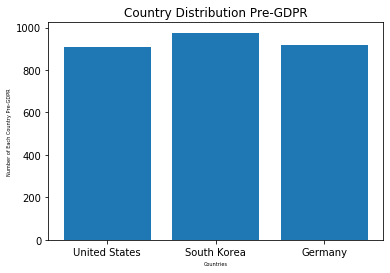

In [15]:
countries = ["United States", "South Korea", "Germany"]
plt.bar(np.arange(len(countries)), country_count)
plt.xlabel('Countries', fontsize=5)
plt.ylabel('Number of Each Country Pre-GDPR', fontsize=5)
plt.xticks(np.arange(len(countries)),countries, fontsize=10)
plt.title('Country Distribution Pre-GDPR')
plt.show()

### Histogram of Counts of Datapoints by Category Type

In [16]:
gdpr_merge['category_pre'].unique()

array(['Lifestyle', 'Social', 'Ages 5 & Under'], dtype=object)

In [17]:
l = gdpr_merge[gdpr_merge['category_pre'] == "Lifestyle"].shape[0]
s = gdpr_merge[gdpr_merge["category_pre"] == 'Social'].shape[0]
a = gdpr_merge[gdpr_merge["category_pre"] == 'Ages 5 & Under'].shape[0]
pre_cat_count = [l,s,a]
pre_cat_count

[964, 938, 902]

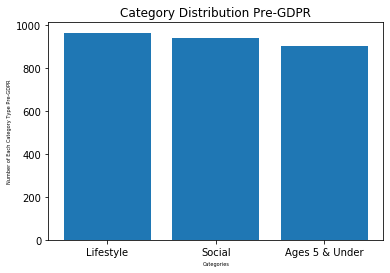

In [18]:
categories = ["Lifestyle", "Social", "Ages 5 & Under"]
plt.bar(np.arange(len(categories)), pre_cat_count)
plt.xlabel('Categories', fontsize=5)
plt.ylabel('Number of Each Category Type Pre-GDPR', fontsize=5)
plt.xticks(np.arange(len(categories)),categories, fontsize=10)
plt.title('Category Distribution Pre-GDPR')
plt.show()

### Histogram of pre-GDPR Google Rank

In [19]:
print('Max pre-GDPR google rank in dataset:', max(gdpr_merge['google_rank_pre'].unique()))
print('Min pre-GDPR google rank in dataset:', min(gdpr_merge['google_rank_pre'].unique()))

Max pre-GDPR google rank in dataset: 540
Min pre-GDPR google rank in dataset: 1


Text(0.5, 1.0, 'Histogram of pre-GDPR google rank')

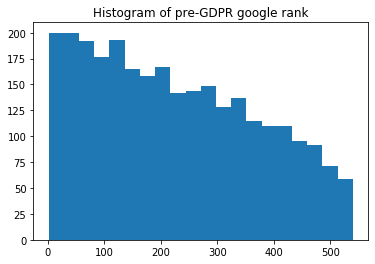

In [20]:
plt.hist(gdpr_merge['google_rank_pre'], bins=20)
plt.title('Histogram of pre-GDPR google rank')

### Histogram of post-GDPR Google Rank

In [21]:
print('Max post-GDPR google rank in dataset:', max(gdpr_merge['google_rank_post'].unique()))
print('Min post-GDPR google rank in dataset:', min(gdpr_merge['google_rank_post'].unique()))

Max post-GDPR google rank in dataset: 539
Min post-GDPR google rank in dataset: 0


Text(0.5, 1.0, 'Histogram of post-GDPR google rank')

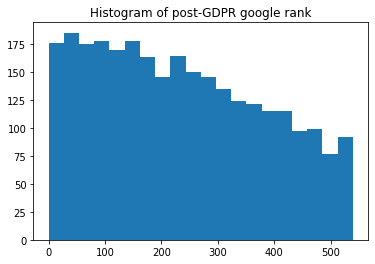

In [22]:
plt.hist(gdpr_merge['google_rank_post'], bins=20)
plt.title('Histogram of post-GDPR google rank')

# Machine Learning Models

In [35]:
#split the train and test data
y = gdpr_merge['category_post']
train_data, X, train_labels, Y = train_test_split(gdpr_merge, y, test_size=0.4)
print ("Train_data: " + str(train_data.shape))
print ("Train_labels: " + str(train_labels.shape))


length = int(len(X)/2)
dev_data = X[0:length]
dev_labels = Y[0:length]
test_data = X[length:]
test_labels = Y[length:]

print ("Dev data: " + str(dev_data.shape))
print ("Dev_labels: " + str(dev_labels.shape))
print ("Test_data: " + str(test_data.shape))
print ("Test_labels: " + str(test_labels.shape))

Train_data: (1682, 21)
Train_labels: (1682,)
Dev data: (561, 21)
Dev_labels: (561,)
Test_data: (561, 21)
Test_labels: (561,)


In [74]:
train_data.tail(10)

,US,South Korea,Germany,google_rank_pre,permission_count_pre,file_size_pre,permission_count_post,file_size_post
2203,1,0,0,391,1,32307811,1,32209180
741,0,0,1,39,14,38616949,14,38616949
2688,0,0,1,213,8,124011442,8,124011442
318,0,1,0,243,13,14394808,13,13170399
354,0,1,0,368,15,12955419,15,12955419
2252,0,1,0,366,2,33391272,6,32831157
265,1,0,0,418,8,7654472,12,17176347
1954,1,0,0,444,5,37461083,5,37846169
1932,1,0,0,210,1,24922587,4,25783838
1011,1,0,0,126,3,7490826,3,7490826


Run a bunch of simple regressions and build model up, increasing features as we go


In [37]:
gdpr_merge.columns

Index(['package_name', 'country', 'category_pre', 'google_rank_pre',
       'permissions_pre', 'permission_count_pre', 'file_size_pre',
       'category_post', 'google_rank_post', 'permissions_post',
       'permission_count_post', 'file_size_post', 'US', 'South Korea',
       'Germany', 'Lifestyle_pre', 'Ages 5 and Under_pre', 'Social_pre',
       'Lifestyle_post', 'Ages 5 and Under_post', 'Social_post'],
      dtype='object')

In [38]:
train_data = train_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
           'google_rank_post', 'permission_count_post', 'file_size_post']]
dev_data = dev_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
           'google_rank_post', 'permission_count_post', 'file_size_post']]

## Relationships Between Variables

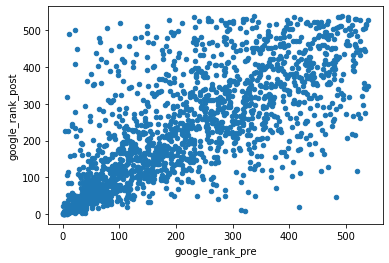

In [39]:
train_data.plot(x='google_rank_pre', y= 'google_rank_post', kind='scatter')

### Logistic Regression Model

In [40]:
Logistic_model = LogisticRegression(C= .01, penalty = 'l1')
Logistic_model.fit(train_data, train_labels)
Logistic_labels = Logistic_model.predict(dev_data)
   
print('The accuracy for the logistic regression model is : ', metrics.f1_score(dev_labels, Logistic_labels, average= 'weighted'))

The accuracy for the logistic regression model is :  0.6387697112230829


In [41]:
c_list = [0.01, 0.05, 0.1, 0.5, 1]
f1_scores = []
for c in c_list:
    Logistic_model = LogisticRegression(C=c, penalty = 'l1')
    Logistic_model.fit(train_data, train_labels)
    Logistic_labels = Logistic_model.predict(dev_data)
    
    f1_scores.append(metrics.f1_score(dev_labels, Logistic_labels, average = 'weighted'))
index = f1_scores.index(max(f1_scores))
max_f1 = max(f1_scores)
print ("The optimal value for c is " + str(c_list[index]) + " with a f1_score of " + str(max_f1))


The optimal value for c is 0.1 with a f1_score of 0.6494154516044195


### Nearest Neighbors

In [42]:
k_list = [1,3,5,7,9,11,13]    
f1_scores = []
for k in k_list:
    KNN_model = KNeighborsClassifier(n_neighbors = k) 
    KNN_model.fit(train_data,train_labels)
    KNN_labels = KNN_model.predict(dev_data) 
    f1_scores.append(metrics.f1_score(dev_labels,KNN_labels, average = 'weighted'))
index = f1_scores.index(max(f1_scores))
max_f1 = max(f1_scores)
print ("The optimal value for k is " + str(k_list[index]) + " with a f1_score of " + str(max_f1))

    


The optimal value for k is 1 with a f1_score of 0.6421134254055446


### MultiNomial Naive Bayes

In [43]:
a_list = [0.01,0.05,0.1,0.5,1,2]    
f1_scores = []
for a in a_list:
    MNNB_model = MultinomialNB(alpha = a) 
    MNNB_model.fit(train_data,train_labels)
    MNNB_labels = MNNB_model.predict(dev_data)
    f1_scores.append(metrics.f1_score(dev_labels, MNNB_labels, average = 'weighted'))
index = f1_scores.index(max(f1_scores))
max_f1 = max(f1_scores)
print ("The optimal value for a is " + str(a_list[index]) + " with a f1_score of " + str(max_f1))



The optimal value for a is 0.01 with a f1_score of 0.3300830782854482


###  Random Forest

In [44]:
rf_model = RandomForestClassifier(n_estimators =100, max_depth = None, random_state = 0, criterion = 'entropy')
rf_model.fit(train_data,train_labels)
rf_labels = rf_model.predict(dev_data)
print('Random Forest: ', metrics.f1_score(dev_labels, rf_labels, average = 'weighted'))


Random Forest:  0.649134160028469


# Predicting the Number of Permissions Requests Post-GDPR
The goal of our third set of models is to predict the number of permissions requests after GDPR.

## More EDA

### Histogram of pre-GDPR permissions counts

In [77]:
print('Max pre-GDPR permission count in dataset:', max(gdpr_merge['permission_count_pre'].unique()))
print('Min post-GDPR permission count in dataset:', min(gdpr_merge['permission_count_pre'].unique()))

Max pre-GDPR permission count in dataset: 436
Min post-GDPR permission count in dataset: 0


Text(0.5, 1.0, 'Histogram of pre-GDPR permissions counts')

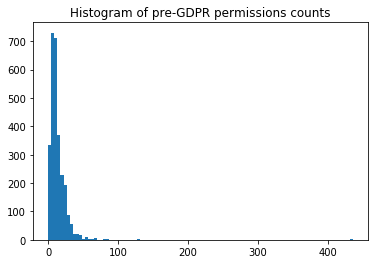

In [78]:
plt.hist(gdpr_merge['permission_count_pre'], bins=100)
plt.title('Histogram of pre-GDPR permissions counts')

### Histogram of post-GDPR permissions counts

In [79]:
print('Max post-GDPR permissions count in dataset:', max(gdpr_merge['permission_count_post'].unique()))
print('Min post-GDPR permissions count in dataset:', min(gdpr_merge['permission_count_post'].unique()))

Max post-GDPR permissions count in dataset: 436
Min post-GDPR permissions count in dataset: 0


Text(0.5, 1.0, 'Histogram of post-GDPR permissions counts')

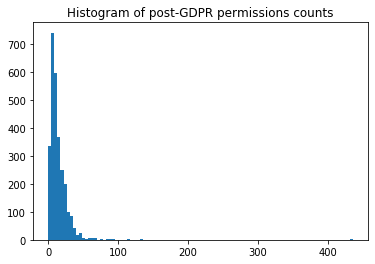

In [115]:
plt.hist(gdpr_merge['permission_count_post'], bins=100)
plt.title('Histogram of post-GDPR permissions counts')

In [116]:
gdpr_merge.describe()

,google_rank_pre,permission_count_pre,file_size_pre,google_rank_post,permission_count_post,file_size_post,US,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post,pre_dangerous,post_dangerous,pre_dangerous_count,post_dangerous_count
count,2804.000000,2804.000000,2.804000e+03,2804.000000,2804.000000,2.804000e+03,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000
mean,225.393367,13.498573,3.248892e+07,234.350571,14.418331,3.437403e+07,0.324893,0.348074,0.327033,0.343795,0.321683,0.334522,0.343081,0.321683,0.335235,0.865906,0.824893,3.327746,3.374822
std,147.152501,15.658948,4.146608e+07,149.737385,16.560770,4.232259e+07,0.468418,0.476445,0.469213,0.475058,0.467206,0.471907,0.474823,0.467206,0.472157,0.340814,0.380126,3.012745,3.152960
min,1.000000,0.000000,2.442000e+04,0.000000,0.000000,2.442000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.750000,6.000000,8.853712e+06,105.750000,7.000000,9.424289e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,208.000000,10.000000,2.245765e+07,220.000000,11.000000,2.429622e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000
75%,342.000000,17.000000,4.227099e+07,354.250000,18.000000,4.555327e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000
max,540.000000,436.000000,8.398433e+08,539.000000,436.000000,8.398433e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,23.000000


In [122]:
print(gdpr_merge.shape)
gdpr_merge[gdpr_merge['permission_count_post'] == 436]['post_dangerous_count']

(2804, 31)


1225    23
1530    23
Name: post_dangerous_count, dtype: int64

### Histogram of changes in permission count

In [128]:
increase_count = gdpr_merge[gdpr_merge['permission_count_post'] > gdpr_merge['permission_count_pre']].shape[0]
same_count = gdpr_merge[gdpr_merge['permission_count_post'] == gdpr_merge['permission_count_pre']].shape[0]
decrease_count = gdpr_merge[gdpr_merge['permission_count_post'] < gdpr_merge['permission_count_pre']].shape[0]

permission_change_counts = [increase_count, same_count, decrease_count]

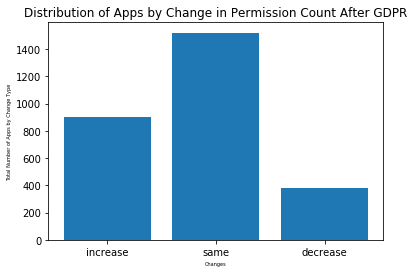

In [131]:
change_types = ['increase', 'same', 'decrease']
plt.bar(np.arange(len(change_types)), permission_change_counts)
plt.xlabel('Changes', fontsize=5)
plt.ylabel('Total Number of Apps by Change Type', fontsize=5)
plt.xticks(np.arange(len(change_types)),change_types, fontsize=10)
plt.title('Distribution of Apps by Change in Permission Count After GDPR')
plt.show()

Text(0.5, 1.0, 'Histogram of Changes in Permission Counts After GDPR')

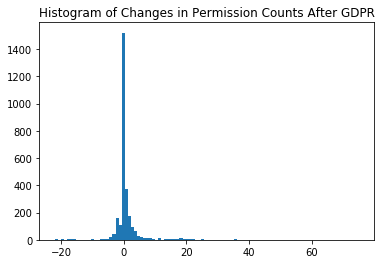

In [133]:
permission_count_difference = gdpr_merge['permission_count_post'] - gdpr_merge['permission_count_pre']

plt.hist(permission_count_difference, bins=100)
plt.title('Histogram of Changes in Permission Counts After GDPR')

### Histogram of number of pre-permissions by category

In [81]:
l_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Lifestyle"]['permission_count_pre'])
s_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Social"]['permission_count_pre'])
a_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Ages 5 & Under"]['permission_count_pre'])
pre_perm_cat_count = [l_pre_permissions, s_pre_permissions, a_pre_permissions]
print(pre_perm_cat_count)

[13166, 17935, 6749]


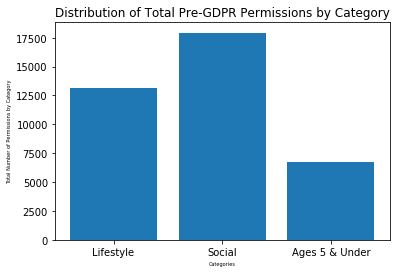

In [82]:
categories = ["Lifestyle", "Social", "Ages 5 & Under"]
plt.bar(np.arange(len(categories)), pre_perm_cat_count)
plt.xlabel('Categories', fontsize=5)
plt.ylabel('Total Number of Permissions by Category', fontsize=5)
plt.xticks(np.arange(len(categories)),categories, fontsize=10)
plt.title('Distribution of Total Pre-GDPR Permissions by Category')
plt.show()

### Histogram of number of post-permissions by category

In [83]:
l_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Lifestyle"]['permission_count_post'])
s_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Social"]['permission_count_post'])
a_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Ages 5 & Under"]['permission_count_post'])
post_perm_cat_count = [l_post_permissions, s_post_permissions, a_post_permissions]
print(post_perm_cat_count)

[14198, 19127, 7104]


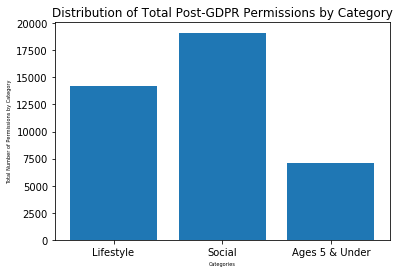

In [84]:
categories = ["Lifestyle", "Social", "Ages 5 & Under"]
plt.bar(np.arange(len(categories)), post_perm_cat_count)
plt.xlabel('Categories', fontsize=5)
plt.ylabel('Total Number of Permissions by Category', fontsize=5)
plt.xticks(np.arange(len(categories)),categories, fontsize=10)
plt.title('Distribution of Total Post-GDPR Permissions by Category')
plt.show()

### Histogram of number of pre-permissions by country

In [85]:
US_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "United States"]['permission_count_pre'])
SK_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "South Korea"]['permission_count_pre'])
GER_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "Germany"]['permission_count_pre'])
pre_perm_country_count = [US_pre_permissions, SK_pre_permissions, GER_pre_permissions]
print(pre_perm_country_count)

[12491, 14403, 10956]


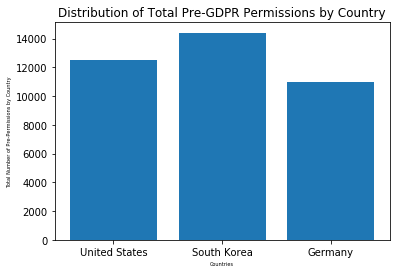

In [86]:
countries = ["United States", "South Korea", "Germany"]
plt.bar(np.arange(len(countries)), pre_perm_country_count)
plt.xlabel('Countries', fontsize=5)
plt.ylabel('Total Number of Pre-Permissions by Country', fontsize=5)
plt.xticks(np.arange(len(countries)),countries, fontsize=10)
plt.title('Distribution of Total Pre-GDPR Permissions by Country')
plt.show()

### Histogram of number of post-permissions by country

In [87]:
US_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "United States"]['permission_count_post'])
SK_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "South Korea"]['permission_count_post'])
GER_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "Germany"]['permission_count_post'])
post_perm_country_count = [US_post_permissions, SK_post_permissions, GER_post_permissions]
print(post_perm_country_count)

[13349, 15185, 11895]


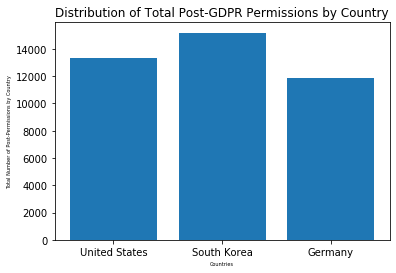

In [88]:
countries = ["United States", "South Korea", "Germany"]
plt.bar(np.arange(len(countries)), post_perm_country_count)
plt.xlabel('Countries', fontsize=5)
plt.ylabel('Total Number of Post-Permissions by Country', fontsize=5)
plt.xticks(np.arange(len(countries)),countries, fontsize=10)
plt.title('Distribution of Total Post-GDPR Permissions by Country')
plt.show()

In [89]:
#split the train and test data
y = gdpr_merge['permission_count_post']
train_data, X, train_labels, Y = train_test_split(gdpr_merge, y, test_size=0.4)
print ("Train_data: " + str(train_data.shape))
print ("Train_labels: " + str(train_labels.shape))


length = int(len(X)/2)
dev_data = X[0:length]
dev_labels = Y[0:length]
test_data = X[length:]
test_labels = Y[length:]

print ("Dev data: " + str(dev_data.shape))
print ("Dev_labels: " + str(dev_labels.shape))
print ("Test_data: " + str(test_data.shape))
print ("Test_labels: " + str(test_labels.shape))

Train_data: (1682, 31)
Train_labels: (1682,)
Dev data: (561, 31)
Dev_labels: (561,)
Test_data: (561, 31)
Test_labels: (561,)


List all the columns

In [90]:
gdpr_merge.columns

Index(['package_name', 'country', 'category_pre', 'google_rank_pre',
       'permissions_pre', 'permission_count_pre', 'file_size_pre',
       'category_post', 'google_rank_post', 'permissions_post',
       'permission_count_post', 'file_size_post', 'US', 'South Korea',
       'Germany', 'Lifestyle_pre', 'Ages 5 and Under_pre', 'Social_pre',
       'Lifestyle_post', 'Ages 5 and Under_post', 'Social_post', 'pre_parsed',
       'post_parsed', 'pre_parsed_dangerous', 'pre_parsed_safe',
       'post_parsed_dangerous', 'post_parsed_safe', 'pre_dangerous',
       'post_dangerous', 'pre_dangerous_count', 'post_dangerous_count'],
      dtype='object')

Pick only the columns that we want

In [91]:
train_data = train_data[['US', 'South Korea', 'Germany','google_rank_pre','permission_count_pre', 'file_size_pre',
                         'permission_count_post', 'file_size_post']]
dev_data = dev_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
            'permission_count_post', 'file_size_post']]

### Linear Regression

In [48]:
lin_model = LinearRegression()
lin_model.fit(train_data, train_labels)
predicted_accuracy = lin_model.predict(dev_data)
r2_model= lin_model.score(predicted_accuracy, dev)  
print ("The R^2 of the regression model is " + str(r2_model))

The R^2 of the regression model is 1.0


Why do we get a R^2 of 1.0 here?

### Random Forest

In [49]:
rf_model = RandomForestClassifier(n_estimators =100, max_depth = None, random_state = 0, criterion = 'entropy')
rf_model.fit(train_data,train_labels)
rf_labels = rf_model.predict(dev_data)
print('Random Forest: ', metrics.f1_score(dev_labels, rf_labels, average = 'weighted'))


Random Forest:  0.8427071477829844


In [50]:
rf_model = RandomForestClassifier(n_estimators =100, max_depth = 2, random_state = 0)
rf_model.fit(train_data,train_labels)
rf_labels = rf_model.predict(dev_data)
print('Random Forest: ', metrics.f1_score(dev_labels, rf_labels, average = 'weighted'))


Random Forest:  0.22800156503918367


# Stuff We Might Do

# Predicting Dangerous Permission Count post-GDPR

In [136]:
increase_dangerous_count = gdpr_merge[gdpr_merge['post_dangerous_count'] > gdpr_merge['pre_dangerous_count']].shape[0]
same_dangerous_count = gdpr_merge[gdpr_merge['post_dangerous_count'] == gdpr_merge['pre_dangerous_count']].shape[0]
decrease_dangerous_count = gdpr_merge[gdpr_merge['post_dangerous_count'] < gdpr_merge['pre_dangerous_count']].shape[0]

dangerous_permission_change_counts = [increase_dangerous_count, same_dangerous_count, decrease_dangerous_count]

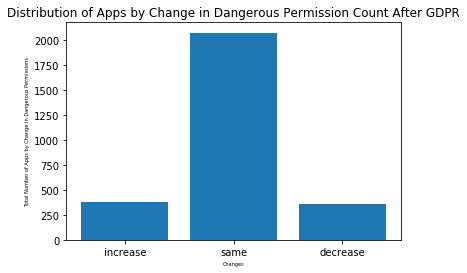

In [137]:
change_types = ['increase', 'same', 'decrease']
plt.bar(np.arange(len(change_types)), dangerous_permission_change_counts)
plt.xlabel('Changes', fontsize=5)
plt.ylabel('Total Number of Apps by Change in Dangerous Permissions', fontsize=5)
plt.xticks(np.arange(len(change_types)),change_types, fontsize=10)
plt.title('Distribution of Apps by Change in Dangerous Permission Count After GDPR')
plt.show()

Text(0.5, 1.0, 'Histogram of Changes in Dangerous Permission Counts After GDPR')

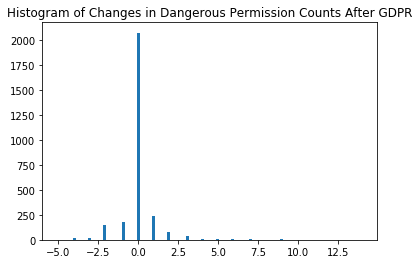

In [138]:
permission_count_difference = gdpr_merge['post_dangerous_count'] - gdpr_merge['pre_dangerous_count']

plt.hist(permission_count_difference, bins=100)
plt.title('Histogram of Changes in Dangerous Permission Counts After GDPR')

### Histogram of number of dangerous pre-permissions by category

In [156]:
l_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Lifestyle"]['pre_dangerous_count'])
s_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Social"]['pre_dangerous_count'])
a_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Ages 5 & Under"]['pre_dangerous_count'])
pre_dang_perm_cat_count = [l_dang_pre_permissions, s_dang_pre_permissions, a_dang_pre_permissions]
print(pre_dang_perm_cat_count)

[3568, 4535, 1228]


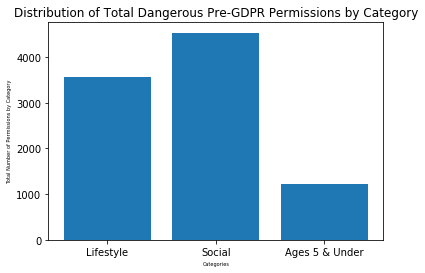

In [157]:
categories = ["Lifestyle", "Social", "Ages 5 & Under"]
plt.bar(np.arange(len(categories)), pre_dang_perm_cat_count)
plt.xlabel('Categories', fontsize=5)
plt.ylabel('Total Number of Permissions by Category', fontsize=5)
plt.xticks(np.arange(len(categories)),categories, fontsize=10)
plt.title('Distribution of Total Dangerous Pre-GDPR Permissions by Category')
plt.show()

### Histogram of number of dangerous post-permissions by category

In [160]:
l_dang_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Lifestyle"]['post_dangerous_count'])
s_dang_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Social"]['post_dangerous_count'])
a_dang_post_permissions = sum(gdpr_merge[gdpr_merge['category_pre'] == "Ages 5 & Under"]['post_dangerous_count'])
post_dang_perm_cat_count = [l_dang_post_permissions, s_dang_post_permissions, a_dang_post_permissions]
print(post_dang_perm_cat_count)

[3631, 4644, 1188]


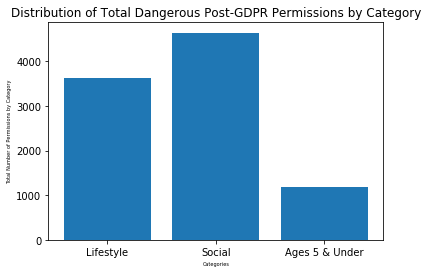

In [161]:
categories = ["Lifestyle", "Social", "Ages 5 & Under"]
plt.bar(np.arange(len(categories)), post_dang_perm_cat_count)
plt.xlabel('Categories', fontsize=5)
plt.ylabel('Total Number of Permissions by Category', fontsize=5)
plt.xticks(np.arange(len(categories)),categories, fontsize=10)
plt.title('Distribution of Total Dangerous Post-GDPR Permissions by Category')
plt.show()

### Histogram of number of dangerous pre-permissions by country

In [165]:
US_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "United States"]['pre_dangerous_count'])
SK_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "South Korea"]['pre_dangerous_count'])
GER_dang_pre_permissions = sum(gdpr_merge[gdpr_merge['country'] == "Germany"]['pre_dangerous_count'])
pre_dang_perm_country_count = [US_dang_pre_permissions, SK_dang_pre_permissions, GER_dang_pre_permissions]
print(pre_dang_perm_country_count)

[3048, 3734, 2549]


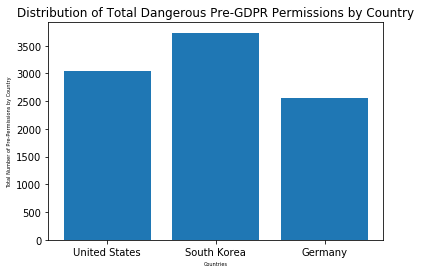

In [166]:
countries = ["United States", "South Korea", "Germany"]
plt.bar(np.arange(len(countries)), pre_dang_perm_country_count)
plt.xlabel('Countries', fontsize=5)
plt.ylabel('Total Number of Pre-Permissions by Country', fontsize=5)
plt.xticks(np.arange(len(countries)),countries, fontsize=10)
plt.title('Distribution of Total Dangerous Pre-GDPR Permissions by Country')
plt.show()

### Histogram of number of dangerous post-permissions by country

In [168]:
US_dang_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "United States"]['post_dangerous_count'])
SK_dang_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "South Korea"]['post_dangerous_count'])
GER_dang_post_permissions = sum(gdpr_merge[gdpr_merge['country'] == "Germany"]['post_dangerous_count'])
post_dang_perm_country_count = [US_dang_post_permissions, SK_dang_post_permissions, GER_dang_post_permissions]
print(post_dang_perm_country_count)

[3086, 3771, 2606]


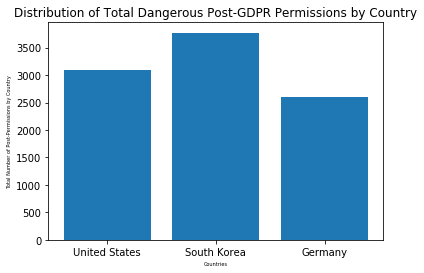

In [169]:
countries = ["United States", "South Korea", "Germany"]
plt.bar(np.arange(len(countries)), post_dang_perm_country_count)
plt.xlabel('Countries', fontsize=5)
plt.ylabel('Total Number of Post-Permissions by Country', fontsize=5)
plt.xticks(np.arange(len(countries)),countries, fontsize=10)
plt.title('Distribution of Total Dangerous Post-GDPR Permissions by Country')
plt.show()

In [72]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = gdpr_merge.corr()
corr.style.background_gradient(cmap='coolwarm')

,google_rank_pre,permission_count_pre,file_size_pre,google_rank_post,permission_count_post,file_size_post,US,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post,pre_dangerous,post_dangerous,pre_dangerous_count,post_dangerous_count
google_rank_pre,1,-0.0891142,-0.100888,0.713649,-0.0890263,-0.102538,-0.017584,-0.0131129,0.0308692,-0.000399116,-0.0092566,0.00956615,-0.000257436,-0.0092566,0.00941842,-0.132393,-0.0968419,-0.143607,-0.137679
permission_count_pre,-0.0891142,1,-0.0484954,-0.106811,0.958418,-0.0349214,0.00942613,0.0587407,-0.0690562,0.00735568,-0.264633,0.254591,0.00644752,-0.264633,0.255373,0.209804,0.216716,0.671815,0.644209
file_size_pre,-0.100888,-0.0484954,1,-0.105484,-0.0579983,0.964234,0.0531336,-0.0792373,0.0274148,-0.218226,0.446201,-0.222072,-0.217892,0.446201,-0.222399,0.0486473,-0.00249297,-0.090176,-0.0914514
google_rank_post,0.713649,-0.106811,-0.105484,1,-0.108037,-0.104139,-0.0102053,-0.00449145,0.0147486,-0.0526959,0.0368131,0.0166014,-0.0510876,0.0368131,0.014949,-0.109653,-0.0398251,-0.156549,-0.1401
permission_count_post,-0.0890263,0.958418,-0.0579983,-0.108037,1,-0.0267672,0.00983726,0.0503113,-0.0609073,0.0135465,-0.272106,0.255758,0.0130921,-0.272106,0.256087,0.187559,0.243259,0.657982,0.677339
file_size_post,-0.102538,-0.0349214,0.964234,-0.104139,-0.0267672,1,0.0545403,-0.0772238,0.0239661,-0.222567,0.430642,-0.202299,-0.222807,0.430642,-0.202061,0.0536723,0.0201892,-0.064591,-0.0494124
US,-0.017584,0.00942613,0.0531336,-0.0102053,0.00983726,0.0545403,1,-0.506898,-0.483596,-0.0147447,0.0145844,0.00040406,-0.0169178,0.0145844,0.00258185,0.0115307,0.037112,0.00415185,0.00278698
South Korea,-0.0131129,0.0587407,-0.0792373,-0.00449145,0.0503113,-0.0772238,-0.506898,1,-0.509373,0.0212104,-0.0287894,0.00715055,0.0207418,-0.0287894,0.00762865,0.0568515,-0.00412801,0.120822,0.113324
Germany,0.0308692,-0.0690562,0.0274148,0.0147486,-0.0609073,0.0239661,-0.483596,-0.509373,1,-0.0068176,0.0146735,-0.00766413,-0.00417231,0.0146735,-0.0103237,-0.0692389,-0.0328575,-0.126829,-0.117853
Lifestyle_pre,-0.000399116,0.00735568,-0.218226,-0.0526959,0.0135465,-0.222567,-0.0147447,0.0212104,-0.0068176,1,-0.498457,-0.513186,0.996838,-0.498457,-0.509237,0.0887277,0.143831,0.0897499,0.0899552


In [59]:
#split the train and test data
y = gdpr_merge['post_dangerous_count']
train_data, X, train_labels, Y = train_test_split(gdpr_merge, y, test_size=0.4)
print ("Train_data: " + str(train_data.shape))
print ("Train_labels: " + str(train_labels.shape))


length = int(len(X)/2)
dev_data = X[0:length]
dev_labels = Y[0:length]
test_data = X[length:]
test_labels = Y[length:]

print ("Dev data: " + str(dev_data.shape))
print ("Dev_labels: " + str(dev_labels.shape))
print ("Test_data: " + str(test_data.shape))
print ("Test_labels: " + str(test_labels.shape))

Train_data: (1682, 31)
Train_labels: (1682,)
Dev data: (561, 31)
Dev_labels: (561,)
Test_data: (561, 31)
Test_labels: (561,)


In [60]:
gdpr_merge.columns

Index(['package_name', 'country', 'category_pre', 'google_rank_pre',
       'permissions_pre', 'permission_count_pre', 'file_size_pre',
       'category_post', 'google_rank_post', 'permissions_post',
       'permission_count_post', 'file_size_post', 'US', 'South Korea',
       'Germany', 'Lifestyle_pre', 'Ages 5 and Under_pre', 'Social_pre',
       'Lifestyle_post', 'Ages 5 and Under_post', 'Social_post', 'pre_parsed',
       'post_parsed', 'pre_parsed_dangerous', 'pre_parsed_safe',
       'post_parsed_dangerous', 'post_parsed_safe', 'pre_dangerous',
       'post_dangerous', 'pre_dangerous_count', 'post_dangerous_count'],
      dtype='object')

Pick only the columns that we want

In [61]:
train_data = train_data[['US', 'South Korea', 'Germany','google_rank_pre','permission_count_pre', 'file_size_pre',
                         'permission_count_post', 'file_size_post', 'pre_dangerous_count', 'post_dangerous_count']]
dev_data = dev_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
            'permission_count_post', 'file_size_post', 'pre_dangerous_count', 'post_dangerous_count']]

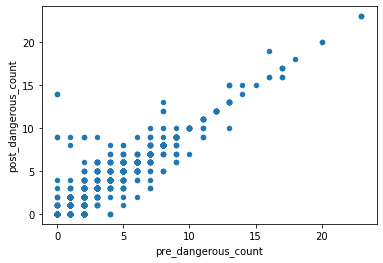

In [62]:
train_data.plot(x='pre_dangerous_count', y= 'post_dangerous_count', kind='scatter')

In [76]:
gdpr_merge.describe()

,google_rank_pre,permission_count_pre,file_size_pre,google_rank_post,permission_count_post,file_size_post,US,South Korea,Germany,Lifestyle_pre,Ages 5 and Under_pre,Social_pre,Lifestyle_post,Ages 5 and Under_post,Social_post,pre_dangerous,post_dangerous,pre_dangerous_count,post_dangerous_count
count,2804.000000,2804.000000,2.804000e+03,2804.000000,2804.000000,2.804000e+03,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000
mean,225.393367,13.498573,3.248892e+07,234.350571,14.418331,3.437403e+07,0.324893,0.348074,0.327033,0.343795,0.321683,0.334522,0.343081,0.321683,0.335235,0.865906,0.824893,3.327746,3.374822
std,147.152501,15.658948,4.146608e+07,149.737385,16.560770,4.232259e+07,0.468418,0.476445,0.469213,0.475058,0.467206,0.471907,0.474823,0.467206,0.472157,0.340814,0.380126,3.012745,3.152960
min,1.000000,0.000000,2.442000e+04,0.000000,0.000000,2.442000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.750000,6.000000,8.853712e+06,105.750000,7.000000,9.424289e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,208.000000,10.000000,2.245765e+07,220.000000,11.000000,2.429622e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000
75%,342.000000,17.000000,4.227099e+07,354.250000,18.000000,4.555327e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000
max,540.000000,436.000000,8.398433e+08,539.000000,436.000000,8.398433e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,23.000000


In [75]:
train_data.head()

,US,South Korea,Germany,google_rank_pre,permission_count_pre,file_size_pre,permission_count_post,file_size_post
1291,0,1,0,515,37,28535711,36,37147606
1925,1,0,0,389,5,43323660,5,43323660
901,0,0,1,455,8,15674053,9,17286902
2011,1,0,0,456,6,31269759,4,27345896
899,0,0,1,106,23,28067719,23,28067719


## Predicting Post-GDPR Google Rank
The goal of our second set of models is to predict the app’s post-GDPR google rank.

In [65]:
#split the train and test data
y = gdpr_merge['google_rank_post']
train_data, X, train_labels, Y = train_test_split(gdpr_merge, y, test_size=0.4)
print ("Train_data: " + str(train_data.shape))
print ("Train_labels: " + str(train_labels.shape))


length = int(len(X)/2)
dev_data = X[0:length]
dev_labels = Y[0:length]
test_data = X[length:]
test_labels = Y[length:]

print ("Dev data: " + str(dev_data.shape))
print ("Dev_labels: " + str(dev_labels.shape))
print ("Test_data: " + str(test_data.shape))
print ("Test_labels: " + str(test_labels.shape))

Train_data: (1682, 31)
Train_labels: (1682,)
Dev data: (561, 31)
Dev_labels: (561,)
Test_data: (561, 31)
Test_labels: (561,)


List all the columns

In [66]:
gdpr_merge.columns

Index(['package_name', 'country', 'category_pre', 'google_rank_pre',
       'permissions_pre', 'permission_count_pre', 'file_size_pre',
       'category_post', 'google_rank_post', 'permissions_post',
       'permission_count_post', 'file_size_post', 'US', 'South Korea',
       'Germany', 'Lifestyle_pre', 'Ages 5 and Under_pre', 'Social_pre',
       'Lifestyle_post', 'Ages 5 and Under_post', 'Social_post', 'pre_parsed',
       'post_parsed', 'pre_parsed_dangerous', 'pre_parsed_safe',
       'post_parsed_dangerous', 'post_parsed_safe', 'pre_dangerous',
       'post_dangerous', 'pre_dangerous_count', 'post_dangerous_count'],
      dtype='object')

Pick only the columns that we want

In [67]:
train_data = train_data[['US', 'South Korea', 'Germany','google_rank_pre','permission_count_pre', 'file_size_pre',
                         'permission_count_post', 'file_size_post']]
dev_data = dev_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
            'permission_count_post', 'file_size_post']]

### Linear Regression

In [68]:
lin_model = LinearRegression()
lin_model.fit(train_data, train_labels)
predicted_accuracy = lin_model.predict(dev_data)
r2_model= lin_model.score(train_data, train_labels)  
print ("The R^2 of the regression model is " + str(r2_model))

The R^2 of the regression model is 0.4874311279723549


SHould we print out the coefficients of the regression?

### Random Forest

In [69]:
rf_model = RandomForestClassifier(n_estimators =100, max_depth = None, random_state = 0, criterion = 'entropy')
rf_model.fit(train_data,train_labels)
rf_labels = rf_model.predict(dev_data)
print('Random Forest: ', metrics.f1_score(dev_labels, rf_labels, average = 'weighted'))

Random Forest:  0.0007130124777183602


In [70]:
rf_model = RandomForestClassifier(n_estimators =100, max_depth = 2, random_state = 0)
rf_model.fit(train_data,train_labels)
rf_labels = rf_model.predict(dev_data)
print('Random Forest: ', metrics.f1_score(dev_labels, rf_labels, average = 'weighted'))

Random Forest:  0.0


Why are the f1 scores for the random forest so low?
How can we compare the R^2 reading to the f1 score?

## Dealing with Unique Permisions ??

In [51]:
#split the train and test data
y = gdpr_merge['permission_count_post']
train_data, X, train_labels, Y = train_test_split(gdpr_merge, y, test_size=0.4)
print ("Train_data: " + str(train_data.shape))
print ("Train_labels: " + str(train_labels.shape))


length = int(len(X)/2)
dev_data = X[0:length]
dev_labels = Y[0:length]
test_data = X[length:]
test_labels = Y[length:]

print ("Dev data: " + str(dev_data.shape))
print ("Dev_labels: " + str(dev_labels.shape))
print ("Test_data: " + str(test_data.shape))
print ("Test_labels: " + str(test_labels.shape))

Train_data: (1682, 21)
Train_labels: (1682,)
Dev data: (561, 21)
Dev_labels: (561,)
Test_data: (561, 21)
Test_labels: (561,)


List all the columns

In [52]:
gdpr_merge.columns

Index(['package_name', 'country', 'category_pre', 'google_rank_pre',
       'permissions_pre', 'permission_count_pre', 'file_size_pre',
       'category_post', 'google_rank_post', 'permissions_post',
       'permission_count_post', 'file_size_post', 'US', 'South Korea',
       'Germany', 'Lifestyle_pre', 'Ages 5 and Under_pre', 'Social_pre',
       'Lifestyle_post', 'Ages 5 and Under_post', 'Social_post'],
      dtype='object')

Pick only the columns that we want

In [152]:
train_data = train_data[['US', 'South Korea', 'Germany','google_rank_pre','permission_count_pre', 'file_size_pre',
                         'pre_dangerous', 'post_dangerous']]
dev_data = dev_data[['US', 'South Korea', 'Germany', 'google_rank_pre','permission_count_pre', 'file_size_pre', 
             'pre_dangerous', 'post_dangerous']]

KeyError: "['pre_dangerous', 'post_dangerous'] not in index"

In [54]:
#we want a list/set containing all of the unique permissions in the dataset
unique_permissions = []


# we can start by creating a list of each row's permissionsall_permissions (which will be a list of lists
permissions = [i for i in gdpr_merge['permissions_pre']]
print(permissions[0])

for i in permissions:
    new_permissions = i.strip('][').split(', ')

    for x in new_permissions:
        # check if exists in unique_permissions list or not
        if x not in unique_permissions:
            unique_permissions.append(x)

print('There are', len(unique_permissions), 'unique permissions in the dataset.','\n')
unique_permissions = [i.strip('\'') for i in unique_permissions]
unique_permissions


['android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE']
There are 2281 unique permissions in the dataset. 



['android.permission.INTERNET',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.ACCESS_FINE_LOCATION',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.READ_PHONE_STATE',
 'android.permission.READ_EXTERNAL_STORAGE',
 'android.permission.WAKE_LOCK',
 'com.google.android.c2dm.permission.RECEIVE',
 'app.fortunebox.permission.C2D_MESSAGE',
 'android.permission.VIBRATE',
 'android.permission.RECEIVE_BOOT_COMPLETED',
 'com.sec.android.provider.badge.permission.READ',
 'com.sec.android.provider.badge.permission.WRITE',
 'com.htc.launcher.permission.READ_SETTINGS',
 'com.htc.launcher.permission.UPDATE_SHORTCUT',
 'com.sonyericsson.home.permission.BROADCAST_BADGE',
 'com.sonymobile.home.permission.PROVIDER_INSERT_BADGE',
 'com.anddoes.launcher.permission.UPDATE_COUNT',
 'com.majeur.launcher.permission.UPDATE_BADGE',
 'com.huawei.android.launcher.permission.CHANGE_BADGE',
 'com.huawei.android.launcher.permission.REA

# Predicting Whether an App Will Have Dangerous Permissions post-GDPR

In [139]:
print('Max pre-GDPR dangerous permissions count in dataset:', max(gdpr_merge['pre_dangerous_count'].unique()))
print('Min pre-GDPR dangerous permissions count in dataset:', min(gdpr_merge['pre_dangerous_count'].unique()))

Max pre-GDPR dangerous permissions count in dataset: 23
Min pre-GDPR dangerous permissions count in dataset: 0


Text(0.5, 1.0, 'Histogram of pre-GDPR dangerous permissions counts')

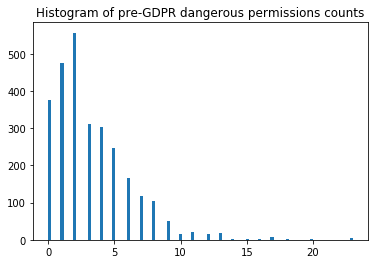

In [140]:
plt.hist(gdpr_merge['pre_dangerous_count'], bins=100)
plt.title('Histogram of pre-GDPR dangerous permissions counts')

In [148]:
print('Max post-GDPR permissions count in dataset:', max(gdpr_merge['post_dangerous_count'].unique()))
print('Min post-GDPR permissions count in dataset:', min(gdpr_merge['post_dangerous_count'].unique()))

print(gdpr_merge[gdpr_merge['post_dangerous_count'] == 0].shape[0])

Max post-GDPR permissions count in dataset: 23
Min post-GDPR permissions count in dataset: 0
491


Text(0.5, 1.0, 'Histogram of post-GDPR dangerous permissions counts')

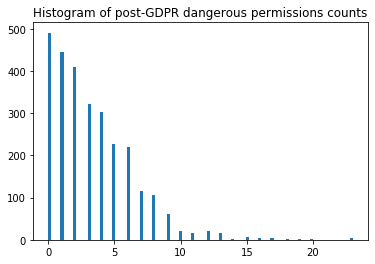

In [142]:
plt.hist(gdpr_merge['post_dangerous_count'], bins=100)
plt.title('Histogram of post-GDPR dangerous permissions counts')

In [101]:
safe_apps_count_pre = 0
dangerous_apps_count_pre = 0
for i in gdpr_merge['pre_dangerous']:
    if i==0:
        safe_apps_count_pre += 1
    if i==1:
        dangerous_apps_count_pre += 1

app_safety_count_pre = [safe_apps_count_pre, dangerous_apps_count_pre]
app_safety_count_pre

[376, 2428]

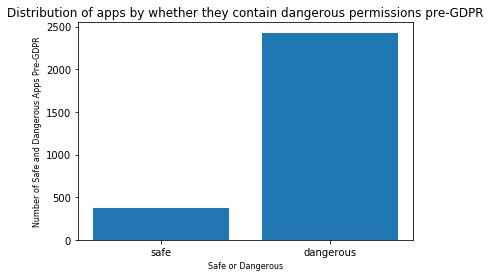

In [110]:
app_safety_type = ['safe','dangerous']
plt.bar(np.arange(len(app_safety_type)), app_safety_count_pre)
plt.xlabel('Safe or Dangerous', fontsize=8)
plt.ylabel('Number of Safe and Dangerous Apps Pre-GDPR', fontsize=8)
plt.xticks(np.arange(len(app_safety_type)),app_safety_type, fontsize=10)
plt.title('Distribution of apps by whether they contain dangerous permissions pre-GDPR')
plt.show()

In [104]:
safe_apps_count_post = 0
dangerous_apps_count_post = 0
for i in gdpr_merge['post_dangerous']:
    if i==0:
        safe_apps_count_post += 1
    if i==1:
        dangerous_apps_count_post += 1

app_safety_count_post = [safe_apps_count_post, dangerous_apps_count_post]
app_safety_count_post

[491, 2313]

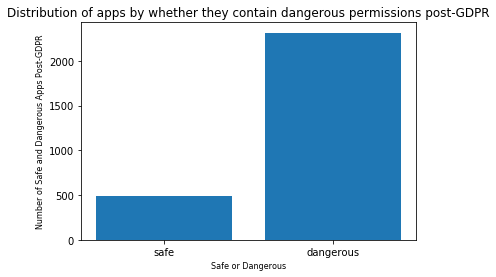

In [109]:
app_safety_type = ['safe','dangerous']
plt.bar(np.arange(len(app_safety_type)), app_safety_count_post)
plt.xlabel('Safe or Dangerous', fontsize=8)
plt.ylabel('Number of Safe and Dangerous Apps Post-GDPR', fontsize=8)
plt.xticks(np.arange(len(app_safety_type)),app_safety_type, fontsize=10)
plt.title('Distribution of apps by whether they contain dangerous permissions post-GDPR')
plt.show()

In [149]:
train_data.plot(x='pre_dangerous', y= 'post_dangerous', kind='scatter')

KeyError: 'pre_dangerous'